/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

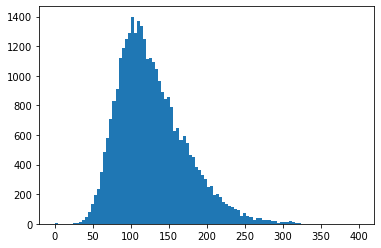

(33, 601946)


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  9 14:00:32 2020

@author: brade
"""
import os
import random as rn
import datetime

from math import pi

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

def dR(y_true, y_pred):
    
    meanPT = 251.32113141268388
    sdPT = 319.7553671379913
    meanEta = 0.0007080969426644717
    sdEta = 1.2658751640311072
    meanPhi = -0.004173354028914741
    sdPhi = 0.8882892151349069

    
    
    truePT=tf.math.add(tf.math.multiply(y_true[:,0], sdPT), meanPT)
    trueEta=tf.math.add(tf.math.multiply(y_true[:,1], sdEta), meanEta)
    truePhi=tf.math.add(tf.math.multiply(y_true[:,1], sdPhi), meanPhi)
    
    predPT=tf.math.add(tf.math.multiply(y_pred[:,0], sdPT), meanPT)
    predEta=tf.math.add(tf.math.multiply(y_pred[:,1], sdEta), meanEta)
    predPhi=tf.math.add(tf.math.multiply(y_pred[:,1], sdPhi), meanPhi)
    

    raw_dphi = truePhi - predPhi;
    dphi = tf.where(tf.abs(raw_dphi)<pi, raw_dphi, raw_dphi-2*pi*tf.math.round(raw_dphi/2*pi))
    
    deta = trueEta - predEta;
    val=tf.math.pow(tf.math.pow(deta,2)+tf.math.pow(dphi,2),0.5)
    return(tf.reduce_mean(val))


    
def dPT(y_true, y_pred):
    meanPT = 251.32113141268388
    sdPT = 319.7553671379913
    
    
    truePT=tf.math.add(tf.math.multiply(y_true[:,0], sdPT), meanPT)
    
    predPT=tf.math.add(tf.math.multiply(y_pred[:,0], sdPT), meanPT)
    
    val=tf.math.divide(predPT,truePT)
    #print(val)
    return(tf.reduce_mean(val))


os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(3)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

newPDGID = {-11.0:[1,0,0,0,0,0,0,0,0,0,0], 
            -13.0:[0,1,0,0,0,0,0,0,0,0,0], 
            -211:[0,0,1,0,0,0,0,0,0,0,0], 
            22.0:[0,0,0,1,0,0,0,0,0,0,0], 
            1.0:[0,0,0,0,1,0,0,0,0,0,0], 
            0.0:[0,0,0,0,0,1,0,0,0,0,0], 
            2.0:[0,0,0,0,0,0,1,0,0,0,0], 
            130.0:[0,0,0,0,0,0,0,1,0,0,0], 
            211.0:[0,0,0,0,0,0,0,0,1,0,0], 
            13.0:[0,0,0,0,0,0,0,0,0,1,0], 
            11.0:[0,0,0,0,0,0,0,0,0,0,1]};

dataInitial=np.load("mlDataNoDupsClean.npy")
data=[]


jetPX = 0.0 
jetPY = 0.0
jetPZ = 0.0
jetE = 0.0
firstPt = 0.0
firstEta = 0.0
firstPhi = 0.0
firstE = 0.0
firstVx=0
firstVy=0
firstVz=0
currentX=0.0
jetSize=[]
for x in range(int(len(dataInitial)*0.9)):
    temp=[]
    if(dataInitial[x,1] !=0 or dataInitial[x,2]!=0 or dataInitial[x,3]!=0 or dataInitial[x,4]!=0 or dataInitial[x,5]!=0 or dataInitial[x,0]!=0):
        if(dataInitial[x,0]==1):
            
            jetPX = 0.0 
            jetPY = 0.0
            jetPZ = 0.0
            jetE = 0.0 
            jetSize.append(x-currentX)
            currentX=x

            firstVx=dataInitial[x,10]
            firstVy=dataInitial[x,11]
            firstVz=dataInitial[x,12]

            firstPT = (dataInitial[x,6]**2 + dataInitial[x,7]**2)**0.5
            firstPhi = 0.0
            firstEta = 0.0
            if(firstPT != 0):
                firstPhi = np.arcsin(dataInitial[x,7]/firstPT)
                firstEta = np.arcsinh(dataInitial[x,8]/firstPT)
            firstE = dataInitial[x,9]

        jetPT = (jetPX**2 + jetPY**2)**0.5
        jetPhi = 0.0
        jetEta = 0.0
        if(jetPT!=0):
            jetPhi = np.arcsin(jetPY/jetPT)
            jetEta = np.arcsinh(jetPZ/jetPT)
        particlePT = (dataInitial[x,6]**2 + dataInitial[x,7]**2)**0.5
        particlePhi = 0.0
        particleEta = 0.0
        if(particlePT != 0):
            particlePhi = np.arcsin(dataInitial[x,7]/particlePT)
            particleEta = np.arcsinh(dataInitial[x,8]/particlePT)
        temp.append(firstPx)
        temp.append(firstPy)
        temp.append(firstPz)
        temp.append(firstE)
        temp.append(firstVx)
        temp.append(firstVy)
        temp.append(firstVz)
        temp.append(jetPX)
        temp.append(jetPY)
        temp.append(jetPZ)
        temp.append(jetE)
        temp.append(dataInitial[x,6])
        temp.append(dataInitial[x,7])
        temp.append(dataInitial[x,8])
        temp.append(dataInitial[x,9])
        temp.append(dataInitial[x,10])
        temp.append(dataInitial[x,11])
        temp.append(dataInitial[x,12])
        temp= temp + newPDGID[dataInitial[x,13]]
        jetPX += dataInitial[x,1]
        jetPY += dataInitial[x,2]
        jetPZ += dataInitial[x,3]
        jetE += dataInitial[x,4]
        jetPT = (jetPX**2 + jetPY**2)**0.5
        jetPhi = 0.0
        jetEta = 0.0
        if(jetPT!=0):
            jetPhi = np.arcsin(jetPY/jetPT)
            jetEta = np.arcsinh(jetPZ/jetPT)
        temp.append(jetPX)
        temp.append(jetPY)
        temp.append(jetPZ)
        temp.append(jetE)
        data.append(np.array(temp))
    
plt.figure()
plt.hist(jetSize, bins=100, range=(0,400))
plt.show()   
  
data=np.array(data).T
print(data.shape)

meanX=np.mean(data[7])
meanY=np.mean(data[8])
meanZ=0#np.mean(data[9])
meanE=np.mean(data[10])

meanVx=np.mean(data[15])
meanVy=np.mean(data[16])
meanVz=np.mean(data[17])

sdX=np.std(data[7])
sdY=np.std(data[8])
sdZ=1#np.std(data[9])
sdE=np.std(data[10])

sdVx=np.std(data[15])
sdVy=np.std(data[16])
sdVz=np.std(data[17])


normInfo1 = np.zeros((29, 2))

for x in range(18, 29):
    normInfo1[x,1] = 1

for x in [4, 15]:
    normInfo1[x,0] = meanVx
    normInfo1[x,1] = sdVx
    
for x in [5, 16]:
    normInfo1[x,0] = meanVy
    normInfo1[x,1] = sdVy
    
for x in [6, 17]:
    normInfo1[x,0] = meanVz
    normInfo1[x,1] = sdVz


for x in [0,7,11]:
    normInfo1[x,0] = meanX
    normInfo1[x,1] = sdX
    
for x in [1,8,12]:
    normInfo1[x,0] = meanY
    normInfo1[x,1] = sdY
    
for x in [2,9,13]:
    normInfo1[x,0] = meanZ
    normInfo1[x,1] = sdZ
    
for x in [3,10,14]:
    normInfo1[x,0] = meanE
    normInfo1[x,1] = sdE

normInfo2 = np.zeros((4,2))
for x in [0]:
    normInfo2[x,0] = meanX
    normInfo2[x,1] = sdX
    
for x in [1]:
    normInfo2[x,0] = meanY
    normInfo2[x,1] = sdY
    
for x in [2]:
    normInfo2[x,0] = meanZ
    normInfo2[x,1] = sdZ
    
for x in [3]:
    normInfo2[x,0] = meanE
    normInfo2[x,1] = sdE

model = tf.keras.models.load_model("jet_regression_big_fixed_phi_no_dups", compile=False)#,custom_objects={"custom_loss": custom_loss})
model.compile(optimizer=tf.keras.optimizers.Adam(0.01,
                  amsgrad=True),loss=tf.keras.losses.MeanSquaredError(),
                  metrics=["mae", "mse",dPT, dR])

#Extract weights and biases
weights = []
biases = []
for layer in model.layers:
    weightBias = layer.get_weights()
    if(len(weightBias) == 2):
        weights.append(weightBias[0].T)
        bias = weightBias[1]
        bias = np.reshape(bias, (len(bias), 1))
        biases.append(bias)

#Save weights and biases to a text file
for x in range(len(weights)):
    np.savetxt("regression"+"/weights_"+str(x)+".txt",
               weights[x], delimiter=",")

for x in range(len(biases)):
    np.savetxt("regression"+"/biases_"+str(x)+".txt",
               biases[x], delimiter=",")

#Save normalization information to a text file
np.savetxt("regression"+"/normInfo1.txt",
           normInfo1, delimiter=",")

#Save normalization information to a text file
np.savetxt("regression"+"/normInfo2.txt",
           normInfo2, delimiter=",")


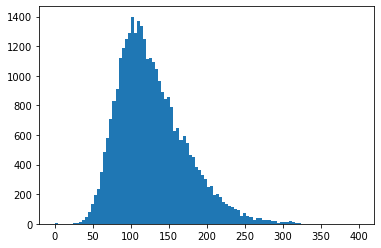

(31, 4136860)


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Sep  9 14:00:32 2020

@author: brade
"""
import os
import random as rn
import datetime

from math import pi

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(3)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

newPDGID = {-11.0:[1,0,0,0,0,0,0,0,0,0,0], 
            -13.0:[0,1,0,0,0,0,0,0,0,0,0], 
            -211:[0,0,1,0,0,0,0,0,0,0,0], 
            22.0:[0,0,0,1,0,0,0,0,0,0,0], 
            1.0:[0,0,0,0,1,0,0,0,0,0,0], 
            0.0:[0,0,0,0,0,1,0,0,0,0,0], 
            2.0:[0,0,0,0,0,0,1,0,0,0,0], 
            130.0:[0,0,0,0,0,0,0,1,0,0,0], 
            211.0:[0,0,0,0,0,0,0,0,1,0,0], 
            13.0:[0,0,0,0,0,0,0,0,0,1,0], 
            11.0:[0,0,0,0,0,0,0,0,0,0,1]};

dataInitial=np.load("mlDataNoDupsClean.npy")
data=[]


jetPX = 0.0 
jetPY = 0.0
jetPZ = 0.0
jetE = 0.0
firstPt = 0.0
firstEta = 0.0
firstPhi = 0.0
firstE = 0.0
firstVx=0
firstVy=0
firstVz=0
currentX=0.0
jetSize=[]
for x in range(int(len(dataInitial)*0.9)):
    
    temp=[]
    correct=0
    weight=1
    if(dataInitial[x,1] !=0 or dataInitial[x,2]!=0 or dataInitial[x,3]!=0 or dataInitial[x,4]!=0 or dataInitial[x,5]!=0 or dataInitial[x,0]!=0):
        weight = 5.14
        correct=1
    if(dataInitial[x,0]==1):
        jetPX = 0.0 
        jetPY = 0.0
        jetPZ = 0.0
        jetE = 0.0 
        jetSize.append(x-currentX)
        currentX=x
        
        firstVx=dataInitial[x,10]
        firstVy=dataInitial[x,11]
        firstVz=dataInitial[x,12]
        
        firstPT = (dataInitial[x,6]**2 + dataInitial[x,7]**2)**0.5
        firstPhi = 0.0
        firstEta = 0.0
        if(firstPT != 0):
            firstPhi = np.arcsin(dataInitial[x,7]/firstPT)
            firstEta = np.arcsinh(dataInitial[x,8]/firstPT)
        firstE = dataInitial[x,9]
        
        
    jetPT = (jetPX**2 + jetPY**2)**0.5
    jetPhi = 0.0
    jetEta = 0.0
    if(jetPT!=0):
        jetPhi = np.arcsin(jetPY/jetPT)
        jetEta = np.arcsinh(jetPZ/jetPT)
    particlePT = (dataInitial[x,6]**2 + dataInitial[x,7]**2)**0.5
    particlePhi = 0.0
    particleEta = 0.0
    if(particlePT != 0):
        particlePhi = np.arcsin(dataInitial[x,7]/particlePT)
        particleEta = np.arcsinh(dataInitial[x,8]/particlePT)
    
    """temp.append(jetPX)
    temp.append(jetPY)
    temp.append(jetPZ)
    temp.append(jetE)
    temp.append(dataInitial[x,6])
    temp.append(dataInitial[x,7])
    temp.append(dataInitial[x,8])
    temp.append(dataInitial[x,9])
    """
    
    temp.append(firstPT)
    temp.append(firstEta)
    temp.append(firstPhi)
    temp.append(firstE)
    temp.append(firstVx)
    temp.append(firstVy)
    temp.append(firstVz)
    temp.append(jetPT)
    temp.append(jetEta)
    temp.append(jetPhi)
    temp.append(jetE)
    temp.append(particlePT)
    temp.append(particleEta)
    temp.append(particlePhi)
    temp.append(dataInitial[x,9])
    temp.append(dataInitial[x,10])
    temp.append(dataInitial[x,11])
    temp.append(dataInitial[x,12])
    temp= temp + newPDGID[dataInitial[x,13]]
    jetPX += dataInitial[x,1]
    jetPY += dataInitial[x,2]
    jetPZ += dataInitial[x,3]
    jetE += dataInitial[x,4]
    temp.append(correct)
    temp.append(weight)
    data.append(np.array(temp))
    
plt.figure()
plt.hist(jetSize, bins=100, range=(0,400))
plt.show()   
  
data=np.array(data).T
print(data.shape)

meanX=np.mean(data[7])
meanY=np.mean(data[8])
meanZ=np.mean(data[9])
meanE=np.mean(data[10])

meanVx=np.mean(data[15])
meanVy=np.mean(data[16])
meanVz=np.mean(data[17])

sdX=np.std(data[7])
sdY=np.std(data[8])
sdZ=np.std(data[9])
sdE=np.std(data[10])

sdVx=np.std(data[15])
sdVy=np.std(data[16])
sdVz=np.std(data[17])

data[0]=(data[0]-meanX)/sdX
data[1]=(data[1]-meanY)/sdY
data[2]=(data[2]-meanZ)/sdZ
data[3]=(data[3]-meanE)/sdE
data[4]=(data[4]-meanVx)/sdVx
data[5]=(data[5]-meanVy)/sdVy
data[6]=(data[6]-meanVz)/sdVz

data[7]=(data[7]-meanX)/sdX
data[8]=(data[8]-meanY)/sdY
data[9]=(data[9]-meanZ)/sdZ
data[10]=(data[10]-meanE)/sdE
data[11]=(data[11]-meanX)/sdX
data[12]=(data[12]-meanY)/sdY
data[13]=(data[13]-meanZ)/sdZ
data[14]=(data[14]-meanE)/sdE

data[15]=(data[15]-meanVx)/sdVx
data[16]=(data[16]-meanVy)/sdVy
data[17]=(data[17]-meanVz)/sdVz

normInfo1 = np.zeros((29, 2))

for x in range(18, 29):
    normInfo1[x,1] = 1

for x in [4, 15]:
    normInfo1[x,0] = meanVx
    normInfo1[x,1] = sdVx
    
for x in [5, 16]:
    normInfo1[x,0] = meanVy
    normInfo1[x,1] = sdVy
    
for x in [6, 17]:
    normInfo1[x,0] = meanVz
    normInfo1[x,1] = sdVz


for x in [0,7,11]:
    normInfo1[x,0] = meanX
    normInfo1[x,1] = sdX
    
for x in [1,8,12]:
    normInfo1[x,0] = meanY
    normInfo1[x,1] = sdY
    
for x in [2,9,13]:
    normInfo1[x,0] = meanZ
    normInfo1[x,1] = sdZ
    
for x in [3,10,14]:
    normInfo1[x,0] = meanE
    normInfo1[x,1] = sdE

normInfo2 = np.zeros((4,2))
for x in [0]:
    normInfo2[x,0] = meanX
    normInfo2[x,1] = sdX
    
for x in [1]:
    normInfo2[x,0] = meanY
    normInfo2[x,1] = sdY
    
for x in [2]:
    normInfo2[x,0] = meanZ
    normInfo2[x,1] = sdZ
    
for x in [3]:
    normInfo2[x,0] = meanE
    normInfo2[x,1] = sdE

model = tf.keras.models.load_model("classification_verticies_seed_no_weights_no_dups", compile=False)#,custom_objects={"custom_loss": custom_loss})
model.compile(optimizer=tf.keras.optimizers.Adam(0.01,
                  amsgrad=True),loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

#Extract weights and biases
weights = []
biases = []
for layer in model.layers:
    weightBias = layer.get_weights()
    if(len(weightBias) == 2):
        weights.append(weightBias[0].T)
        bias = weightBias[1]
        bias = np.reshape(bias, (len(bias), 1))
        biases.append(bias)

#Save weights and biases to a text file
for x in range(len(weights)):
    np.savetxt("classification"+"/weights_"+str(x)+".txt",
               weights[x], delimiter=",")

for x in range(len(biases)):
    np.savetxt("classification"+"/biases_"+str(x)+".txt",
               biases[x], delimiter=",")

#Save normalization information to a text file
np.savetxt("classification"+"/normInfo1.txt",
           normInfo1, delimiter=",")



